# 作業

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans

### 用 iris (dataset.load_iris()) 資料嘗試跑 kmeans (可以測試不同的群數 , init 等)

In [5]:
from sklearn import datasets

iris = datasets.load_iris()
# 只用到三類特徵
X = iris.data[:, 1:]
X_all = iris.data
y = iris.target

In [5]:
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

### 載入 相關套件 並 執行 kmean 實驗 ...

- 實驗測試不同的群數
- 實驗測試不同的初始值
- 呈現結果

In [6]:
def cluster_plot(X, y, label_name):
    fig = plt.figure(figsize=(8, 6))
    ax = fig.gca(projection='3d')
    ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y, cmap=plt.cm.jet)
    ax.set_xlabel(label_name[0])
    ax.set_ylabel(label_name[1])
    ax.set_zlabel(label_name[2])
    ax.view_init(elev=30, azim=225)

### Ground Truth

In [3]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

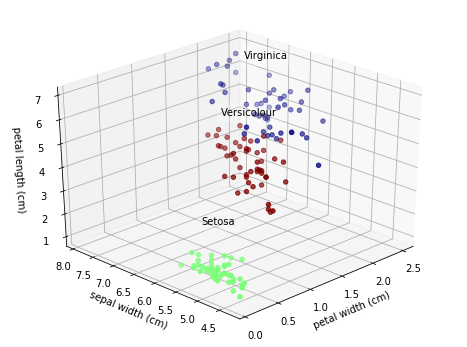

In [10]:
fig = plt.figure(figsize=(8, 6))
ax = fig.gca(projection='3d')
for name, label in [('Setosa', 0),
                    ('Versicolour', 1),
                    ('Virginica', 2)]:
    ax.text3D(X_all[y == label, 3].mean(),
              X_all[y == label, 0].mean(),
              X_all[y == label, 2].mean() + 2, name,
              horizontalalignment='center',
              bbox=dict(alpha=.2, edgecolor='w', facecolor='w'))
    
#   根據label的順序重排  
y_ground = np.choose(y, [1, 2, 0]).astype(np.float)
ax.scatter(X_all[:, 3], X_all[:, 0], X_all[:, 2], c=y_ground, cmap=plt.cm.jet)
ax.set_xlabel(iris.feature_names[1:][2])
ax.set_ylabel(iris.feature_names[1:][0])
ax.set_zlabel(iris.feature_names[1:][1])
ax.view_init(elev=30, azim=225)

### 分兩群

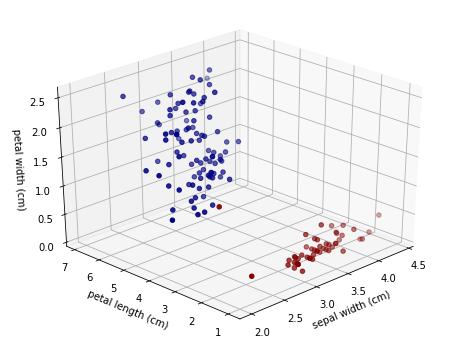

In [12]:
estimator = KMeans(n_clusters=2)
estimator.fit(X)
y_pred = estimator.labels_

cluster_plot(X, y_pred, iris.feature_names[1:])

### 隨機起始分三群

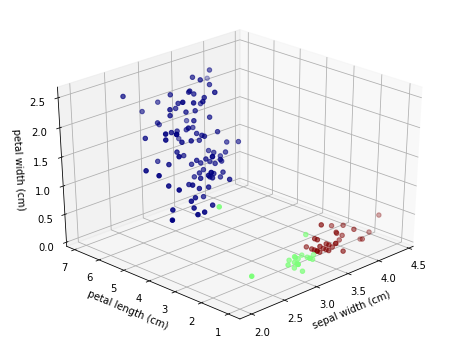

In [14]:
estimator = KMeans(n_clusters=3, n_init=1, init='random')
estimator.fit(X)
y_pred = estimator.labels_

cluster_plot(X, y_pred, iris.feature_names[1:])